## Interação interespecífica

Numa interação entre duas espécies $P$ e $A$ o modelo da dinâmica populacional da espécie $P$ com as espécie $A$ é dado por
$$P_{n+1}=P_n+\lambda_pP_n\left(1-\frac{P_n}{K_p}\eta\right)+\gamma_{a,p}A_nP_n,$$
onde $\lambda_p$ é a taxa de crescimento da espécie $P$ e o parâmetro $\gamma_{a,p}$ indica o quanto a presença da espécie $A$ beneficia/prejudica a espécie $P.$ 

Nesse modelo temos que $\eta$ é uma variável binária cujo valor será um para usar o modelo de Verhulst, que considera a capacidade de suporte $K_p$ do ambiente para a espécie $P$, e utilizaremos o valor 0 para o modelo simples.

No código a seguir implementamos o método 

`interaction(p_n,growth_rate,support_capacity,a_n,gamma_ap, verhulst = False, support_capacity =1)`

que retorna a o número de indivíduos da espécie $P$ na geração $n+1$ na interação com a espécie $A.$
Para utilizar o modelo de verhulst utilizamos `verhulst = True` e passamos o valor do último argumento que é a capacidade de suporte.

In [4]:
def interaction(p_n,growth_rate,a_n,a, verhulst = False,support_capacity =1):
    return p_n+growth_rate*(1-(p_n/support_capacity)*verhulst)+a*a_n*p_n

### Presa predador
Numa interação intraespecífica entre uma predador $P$ e uma presa $Q$, espécie predadora é benefeciada pela presença de presas que, por outro lado, são prejudicas pela presença de predadores. Assim, consideramos o sistema de equações 
$$P_{n+1}=P_n+\lambda_pP_n\left(1-\frac{P_n}{K_p}\right)+\gamma_{q,p}Q_nP_n$$
$$Q_{n+1}=Q_n+\lambda_pQ_n\left(1-\frac{Q_n}{K_q}\right)-\gamma_{p,q}P_nQ_n$$

#### Análise 1

Modelo simples

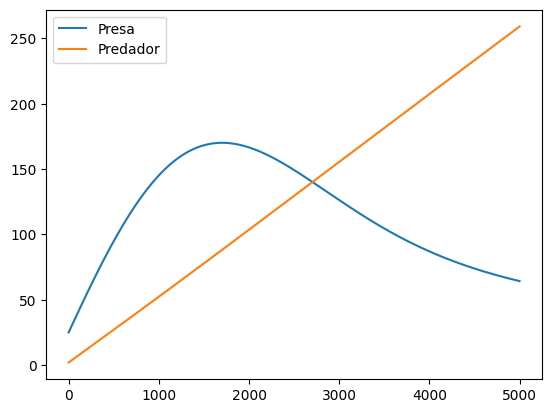

In [5]:
prey = [25]
predator = [2]
generation = [0]
n = 5000

for i in range(n):
    prey.append(interaction(prey[i],0.15,predator[i],-1e-5))
    predator.append(interaction(predator[i],0.05,prey[i],1e-7))
    generation.append(i+1)

from matplotlib import pyplot as plt
plt.plot(generation,prey,label="Presa")
plt.plot(generation,predator,label="Predador")
plt.legend()
plt.show()

#### Análise 2

Modelo com Verhulst

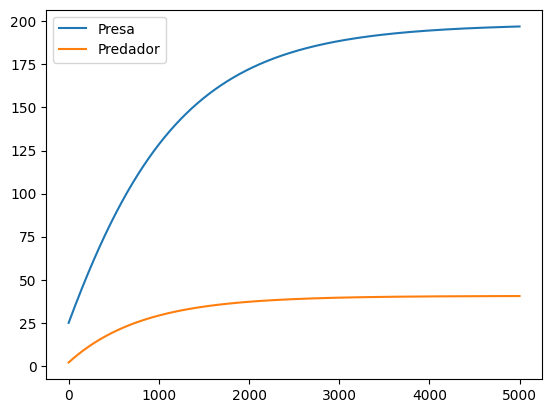

In [6]:
prey = [25]
predator = [2]
generation = [0]
n = 5000

for i in range(n):
    prey.append(interaction(prey[i],0.15, predator[i],-1e-5, True,430))
    predator.append(interaction(predator[i],0.05,prey[i],1e-7,True, 40))
    generation.append(i+1)

from matplotlib import pyplot as plt
plt.plot(generation,prey,label="Presa")
plt.plot(generation,predator,label="Predador")
plt.legend()
plt.show()